# Lista de Exercícios 2 - Elementos de Processamento de Imagens

Prof. Gilson Antonio Giraldi \
Aluno Lorran de Araújo Durães Soares \
Questão 1

1- Tome a distribuição normal bidimensional padrão (veja página 32, referência [2]). (a) Usando versões discretas dessa função, construa um filtro passa-baixa. (b) Agora, derive em relação às variáveis x e y da distribuição normal bidimensional e repita o item anterior. Usando a transformada de Fourier de sequências e o teorema de convolução correspondente (teorema 3 de aula2.pdf), tente caracterizar o tipo de filtros obtidos. (c) Aplique os filtros sobre uma imagem e analise os resultados.

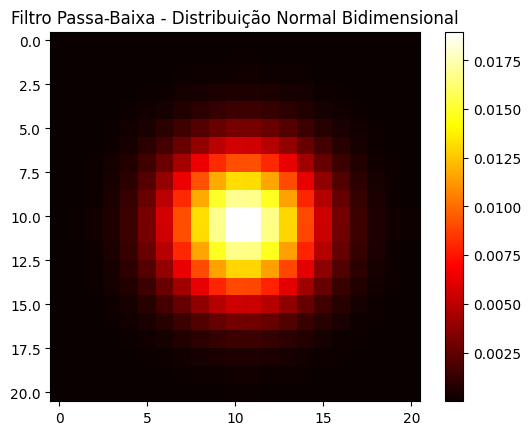

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do filtro
size = 21  # Tamanho do filtro (deve ser ímpar)
sigma = 3  # Desvio padrão
#considerando media 0

# Criação do grid
x = np.linspace(-size//2, size//2, size)
y = np.linspace(-size//2, size//2, size)
x, y = np.meshgrid(x, y)

# Função de distribuição normal bidimensional
normal_pdf = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Normalização do filtro
normal_pdf /= np.sum(normal_pdf)

# Visualização do filtro
plt.imshow(normal_pdf, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Filtro Passa-Baixa - Distribuição Normal Bidimensional')
plt.show()

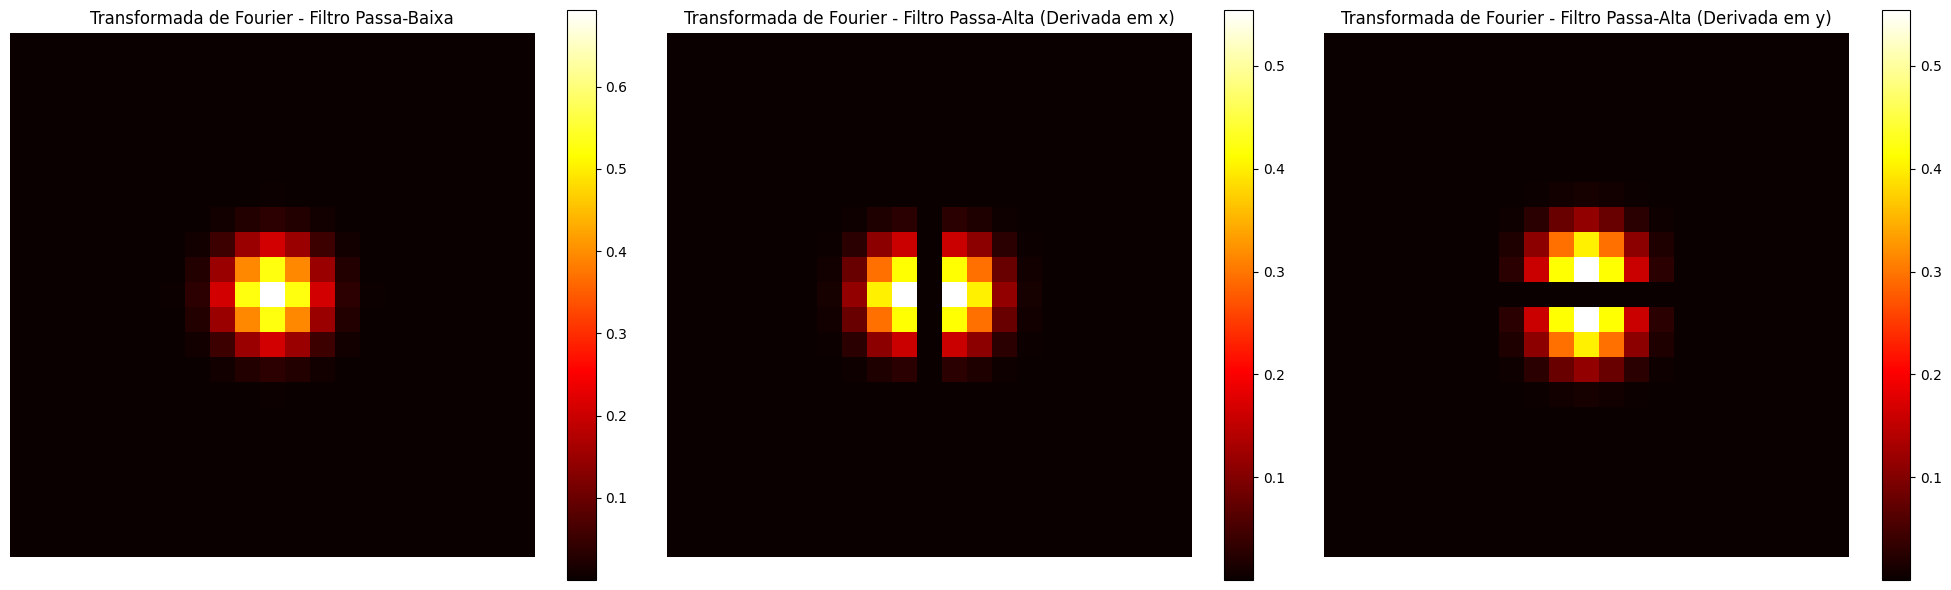

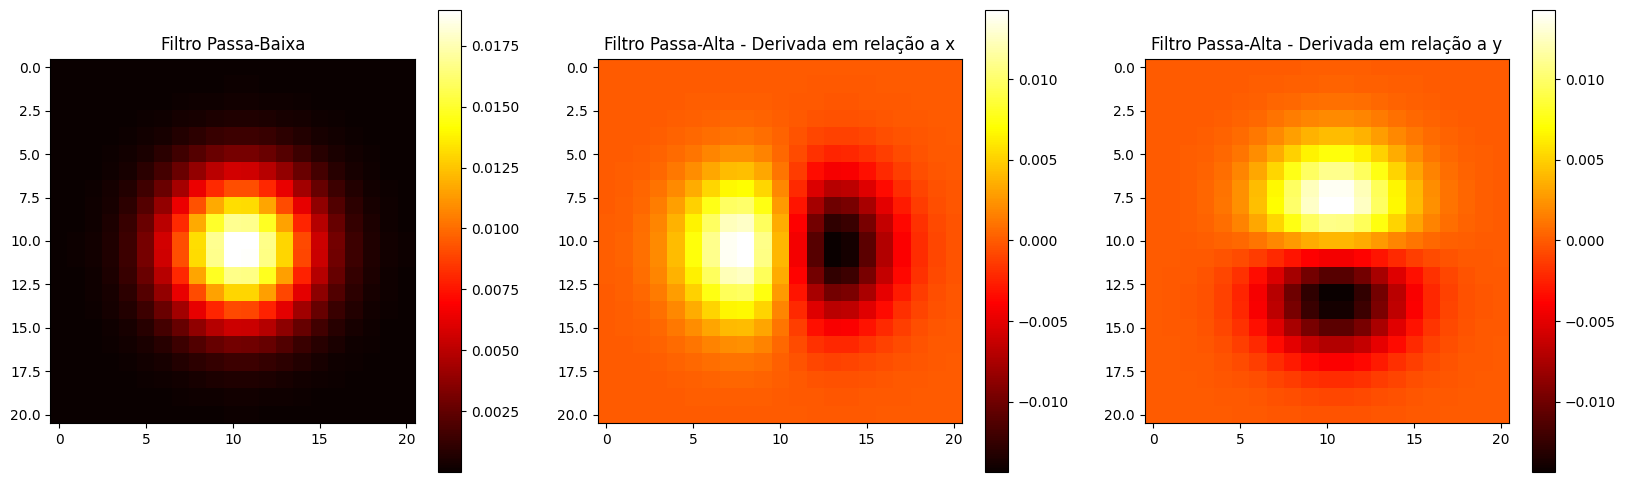

In [27]:
# Derivadas em relação a x e y
df_dx = - (x / (np.power(sigma,3) * np.sqrt(2*np.pi))) * np.exp(- (x**2 + y**2) / (2 * (sigma ** 2)))
df_dy = - (y / (np.power(sigma,3) * np.sqrt(2*np.pi))) * np.exp(- (x**2 + y**2) / (2 * (sigma ** 2)))

# Normalização dos filtros de derivada
df_dx /= np.sum(np.abs(df_dx))
df_dy /= np.sum(np.abs(df_dy))

# Função para calcular e plotar a Transformada de Fourier
def plot_fourier_transform(filter_matrix, title):
    # Calcular a Transformada de Fourier
    f_transform = np.fft.fft2(filter_matrix)
    f_transform_shifted = np.fft.fftshift(f_transform)  # Centraliza a frequência zero

    # Calcular a magnitude
    magnitude = np.abs(f_transform_shifted)
    magnitude_log = np.log(1 + magnitude)  # Usar log para melhor visualização

    # Plotar
    plt.imshow(magnitude_log, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.axis('off')

# Visualização dos filtros no espaço da frequência
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plot_fourier_transform(normal_pdf, 'Transformada de Fourier - Filtro Passa-Baixa')

plt.subplot(1, 3, 2)
plot_fourier_transform(df_dx, 'Transformada de Fourier - Filtro Passa-Alta (Derivada em x)')

plt.subplot(1, 3, 3)
plot_fourier_transform(df_dy, 'Transformada de Fourier - Filtro Passa-Alta (Derivada em y)')

plt.tight_layout()
plt.show()

# Visualização dos filtros no espaço do domínio
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.imshow(normal_pdf, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Filtro Passa-Baixa')

plt.subplot(1, 3, 2)
plt.imshow(df_dx, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Filtro Passa-Alta - Derivada em relação a x')

plt.subplot(1, 3, 3)
plt.imshow(df_dy, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Filtro Passa-Alta - Derivada em relação a y')

plt.show()

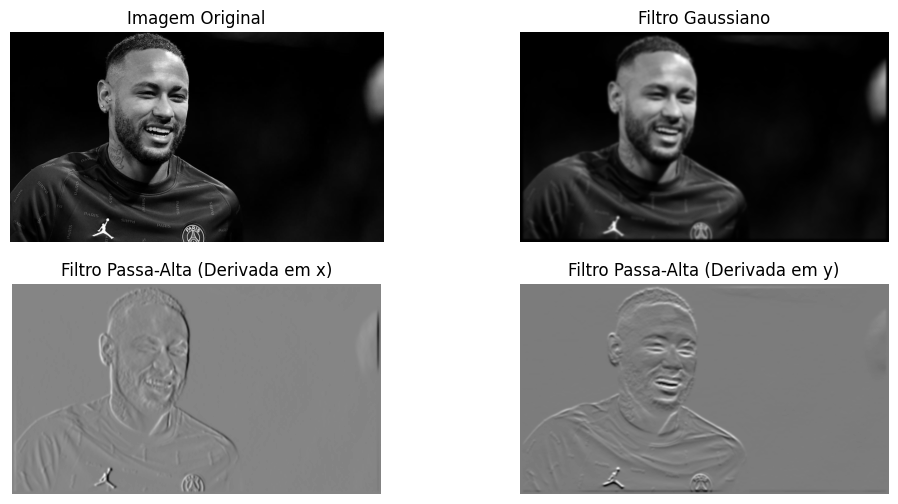

In [30]:
from scipy.signal import convolve
from skimage import io, color

# Carregar uma imagem (pode usar uma imagem do seu computador)
image = io.imread('./data1/neymar-city.jpg')  # Insira o caminho da imagem
image_gray = color.rgb2gray(image)  # Convertendo para escala de cinza

# Aplicar os filtros na imagem
filtered_image = convolve(image_gray, normal_pdf)
filtered_image_dx = convolve(image_gray, df_dx)
filtered_image_dy = convolve(image_gray, df_dy)

# Visualização das imagens filtradas
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtro Gaussiano')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(filtered_image_dx, cmap='gray')
plt.title('Filtro Passa-Alta (Derivada em x)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(filtered_image_dy, cmap='gray')
plt.title('Filtro Passa-Alta (Derivada em y)')
plt.axis('off')

plt.show()